# Cognitive Modelling Assignment 2  <font color='red'>Deadline = 30 april 23:59</font>

In totaal kan je voor deze opdracht __81 punten__ halen + 5 bonuspunten.

## Fitting functions

Hieronder volgen wat korte vragen en uitleg over model fitting ter voorbereiding op de verdere assignments. Een deel van de thoerie komt misschien bekend voor. Het is de bedoeling dat je op basis van deze simpele opdracht in ziet hoe het fitten van een cognitief model, niet veel verschilt van het fitten van wiskundige formule fitten op data. In de basis is het idee dat je door een bepaalde methode de parameters van de desbetreffende functie kan vinden die de data, of het gedrag van mensen, zo goed mogelijk kan beschrijven. 

Wegens historische redenen is het eerste deel van deze opdracht nog in het Engels, je mag in het Nederlands of in het Engels antwoorden. 

Bij elke vraag staat de hoeveelheid punten die je er voor kan krijgen. Geef antwoorden in blokken met code of met tekst. Gebruik voor antwoorden met tekst de ">" voor blockquotes en geef bij elke vraag ook __kort uitleg__ als hier om wordt gevraagd. __Let op__: soms staan er meerdere vragen bij een onderdeel, lees de tekst dus nauwkeurig. 

Sla het uiteindelijke notebook op met jullie studentnummers en achternamen in de filenaam: `studentnummer_achternaam_opdrachtnummer`.

In [1]:
from scipy import stats
import numpy as np
import random
import math

%matplotlib inline
import matplotlib.pyplot as plt

---

## 0. Fitting functions

Voor deze inleidende opdracht schrijven we verschillende functies en gaan deze op data "fitten". De meeste concepten hier moeten bekend zijn uit de cursus *Leren*, behalve dat we de *SciPy*-library zullen gebruiken om in de functies te fitten op data. Met fitten bedoelen we de optimale waarden vinden van de parameters in de functie zodat deze de data het best mogelijk benadert. De *SciPy*-library komt goed van pas bij latere opdrachten, dus het is handig om hier alvast wat elementen te introduceren.

### Generating simulation data

Assume there is some model that is defined by the following function:

$$y = e^{\frac{3 x}{20}}$$

Imagine that this represents the relationship between the temperature (`x`) and the amount of ice cream sold (`y`) in a small ice cream store. The higher the temperature the more ice-cream is sold. For an ice-creamshop owner it would be good to know this exact relationship, such that she can predict how much to have in store when the temperature is changing. 

Of course, such a relationship cannot be found in a book but must be estimated from the data. So in the first step we will generate some data.  

* Write a function `curve` which implements this model
* Generate a uniformly spaced set of 50 samples over the interval `[1, 13]` using [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* Apply the curve function to the entire *ndarray* of samples using [vectorize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html)

The shop owner is taking note of the ice cream sold on every day but of course such measurements are noisy, not on each day that it is 18 degrees celcius will the exact same amount of people show up. Their ice cream buying behavior will be determined not only by the temperature but also many other factors (e.g. how much money the customers have in their account) that are unknown to the shop owner. Therefore we will add some noise to the data:

* Create an *ndarray* of noise from a Gaussian distribution with $\mu = 0.0$ and $\sigma = 1.0$ using [random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html)
* Add the noise to the curve results to create the artificial simulation data
* Plot the actual underlying curve as a line and the simulated data as dots, both in the same plot

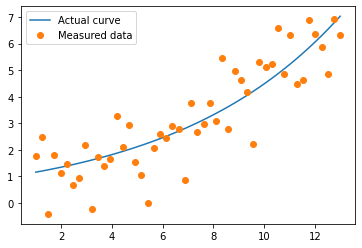

In [2]:
np.random.seed(seed=99999)

def curve(x):
    return math.e**(3*x/20)

samples = np.linspace(1, 13)
model_data = np.vectorize(curve)(samples)

noise = np.random.normal(size=samples.shape)
sim_data = model_data + noise

plt.plot(samples, model_data, label='Actual curve')
plt.plot(samples, sim_data, 'o', label='Measured data')
plt.legend()
plt.show()

---

### Q.0a Fitting a linear model (2 points)

Now we'll use *SciPy* to fit a line through this simulation data. In *Leren* we needed to compute the partial derivative of the error function with respect to each of the model parameters to know how to modify those parameters to get the derivates (close to) zero. Here we will just define what the error function is, and let *SciPy* do the actual minimization work. Let's assume that we are looking at the relationship between the temperature and ice-cream sales volume. We expect that the higher the temperature the more icecream will be sold. 

The first model will be a very basic linear one, with only 1 parameter `a`. This model assumes there is a linear relationship between variables x and y:

$$y = ax$$

*(note: this line will always pass through the origin, in other words the intercept is zero)*

* Write a function `linear` which implements this model

It is our goal to find the optimal value for $\alpha$.

* Write a function `MSE` which computes the *Mean Squared Error* of an array of model estimates `y_hat` and an array of observed data `y`

Already provided is a general function called `MSE_fit_func` which takes 4 arguments:
1. *params:* A set of model parameters for the model function
2. *func:* The model function that is being applied
3. *x:* An array of x values
4. *y:* An array of y values

This function applies the model function to the *x* values using the model parameters and computes the resulting *MSE* with the observed *y* values. Assuming the data (i.e. the *x* and *y* values) and the model function are fixed, the model parameter(s) can be varied and the function will return an *MSE* for each parameter setting.

The *SciPy* module *optimize* has a lot of functions to solve exactly this type of problem, where you change some parameters in order to minimize some function. As the current linear model has only one variable, we'll use the function [minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar)

The function we want to minimize is the `MSE_fit_func` (i.e. the MSE of applying the model function to the data), and as the minimization method we'll use `Brent`. There are quite a few different minimization methods *SciPy* offers, but we won't worry about their differences for now and just use the simple `Brent` method. All minimization functions will try and minimize the returned value of the function by varying its **first argument**. The other function arguments will remain fixed and may be provided with optional argument `args`.

* Finish the call to `minimize_scalar` by filling in the correct values for `args` to fit the linear model to the simulation data generated in *Q1*.

The variable `fit` will now be an [OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult) object.

* Print the variable `fit` and some of its attributes to inspect the results of the minimization
* Plot the simulation data as dots and the fitted linear model as a line, both in the same plot
* Print the value of `a` is that minimizes the linear model MSE on your data
* Print the value of `fun` which is the MSE of the best fitting model.

In [9]:
from scipy import optimize

def linear(x, a):
    return a * x

def MSE(y_hat, y):
    mse = 0
    for i, pred in enumerate(y_hat):
        true = y[i]
        mse += (true - pred) ** 2
    return mse / len(y_hat)

def MSE_fit_func(params, func, x, y):
    return MSE(func(x, params), y)

fit = optimize.minimize_scalar(MSE_fit_func, method='Brent', args=(linear, samples, sim_data))

<br>

---

### Q0.b Fitting a polynomial model (2 points) 

Now, the linear model is a pretty good fit, but the shopkeeper is not satisfied and a math hobbyst and plans to create a new model using a $4^{th}$-order polynomial function:

$$y=b_0+b_1x+b_2x^2+b_3x^3+b_4x^4$$

* Write a function `polynomial` which implements this model, with the argument *b* being an *ndarray* containing all model parameters $b_0 \dots b_4$

When minimizing multiple parameters, we'll need to provide starting values for `b`, from where the minimization function will start the search. For now, you should use `np.array([-5, 9, -4, 1, .01])` as the starting point and we'll come back to selecting sensible starting values for the parameters later.

* Use the function [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to fit the polynomial model to the generated data from *Q1* using the `Nelder-Mead` method
* Plot the simulation data as dots and the fitted polynomial model as a line, both in the same plot
* Print the value of `b` is that minimizes the polynomial model MSE on your data
* Print the value of `fun` which is the MSE of the best fitting model.

In [22]:
fit2

 final_simplex: (array([[ 1.81879852e+00, -4.18965432e-01,  7.83527702e-02,
         2.42020389e-03, -3.04774124e-04],
       [ 1.82019456e+00, -4.20074107e-01,  7.86001261e-02,
         2.39906980e-03, -3.04155779e-04],
       [ 1.81920789e+00, -4.19416774e-01,  7.84565223e-02,
         2.41224001e-03, -3.04576682e-04],
       [ 1.81958164e+00, -4.19615911e-01,  7.85119954e-02,
         2.40491690e-03, -3.04259881e-04],
       [ 1.82012705e+00, -4.19860016e-01,  7.85202613e-02,
         2.40909807e-03, -3.04549691e-04],
       [ 1.81882479e+00, -4.19026598e-01,  7.83659003e-02,
         2.41886427e-03, -3.04709505e-04]]), array([0.86404227, 0.86404229, 0.86404229, 0.8640423 , 0.8640423 ,
       0.8640423 ]))
           fun: 0.8640422739850696
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 1000
           nit: 615
        status: 1
       success: False
             x: array([ 1.81879852e+00, -4.18965432e-01,  7.83527702e-02,  2.42020389e-03

In [21]:
def polynomial(inp, beta):
    y = []
    for x in inp:
        y_val = 0
        for n, b in enumerate(beta):
            y_val += b * (x ** n)
        y.append(y_val)
    return y
            

fit2 = optimize.minimize(MSE_fit_func, np.array([-5, 9, -4, 1, .01]), method='Nelder-Mead',
                        args=(polynomial, samples, sim_data))

print("The best MSE of the best fitting model: ", fit2.fun)

The best MSE of the best fitting model:  0.8640422739850696


---

### Q0.c Comparing models (4 points) 

Now, the linear model is a pretty good fit, but did the shopkeeper improve her model by making it more complex?

* Compare the MSE of both models and report which one has the best fit. 

In [ ]:
# TO DO

The shopkeeper did all is her work in the winter, preparing for the summer to come. Hence, only temperatures between 1 and 13. But now it is spring and new data is comming in. The shopkeeper will now use her best model to predict sales. However, she was surprised to learn what her model predicted!

* report the prediction of the model for 18 degrees celcius (`x = 18`), how does that compare to the best day in winter (`x = 13`)?

In [ ]:
# TO DO

The shopkeeper is again collecting data for 50 days to get a better picture of what is going on. 

* Generate a uniformly spaced set of 50 samples over the interval `[13, 20]` using [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* Apply the curve function to the entire *ndarray* of samples using [vectorize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html)

With the new data she compared the predictions of her original two models with what really happened. 
* Plot the simulation data as dots and the fitted linear and polynomial models in the new plot.
* Print the value of `fun` for both models, which one is now (clearly) the better. Try to explain why.

In [ ]:
# TO DO plot

In [ ]:
# TO DO print values

> Answer here


## Cognitive Model Fitting

In cognitive science different models can represent different theories of how the mind works. These theories are thus formalized in mathematical equations. The different models will make different predictions about the cognitive processes of people and ultimately of their behavior. To differentiate between these models they are often fit to real behavioral (or brain) data, and their "fit" to the data is compared. It is common practice to furhter "punish" models in relation the number of free parameters that they have (to prevent **overfitting**, see debacle with the polynomial above). We will get back to model fitting at point 4 below. 
<br>
<br>

---

# I. Q-Learning

Q-learning algorithmes zijn gebaseerd op de Temporal Difference learning modellen die we eerder hebben besproken. Q-learning leert direct de associatie tussen states, actions en outcomes. De robot krijgt nu dus niet alleen maar beloningen, maar kan ook uitzoeken welke handeling de beste is geveven de situatie.

Details over Q-learning zijn terug te vinden in de college slides en het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6.

Het leren in deze opdracht speelt zich af in een simpel **Markov Decision Process** met de volgende structuur:

![](images/bandit_arms.png)

In deze taak moet de robot telkens uit één van de schatkisten iets pakken. In sommige schatkisten zit meer geld dan in anderen, maar de robot weet in het begin nog niks over de schatkisten, en verwacht er maar weinig van. In elke ronde wordt uitkomst van een schatkist bepaald door een trekking van een waarde uit een normaalverdeling met een ander gemiddelde. Het is aan de robot om er achter te komen welke van de vier schatkisten het meeste oplevert. De uitkomsten van schatkisten verschillen in hun gemiddelde maar niet in de variantie (standaard deviatie). 

We gaan Q-learing gebruiken om te beschrijven hoe de robot leert om de beste keuze te maken:

$$ Q(s_{t+1},a_{t+1})= Q(s_t,a_t) + αδ $$

waarbij $s_t$ de state op tijdstip $t$ is, en $a_t$ de actie op tijdstip $t$. De acties is hier dus het kiezen van een van de kisten (totaal 4 mogelijke acties). Net als bij Rescorla-Wagner en Temporal Difference Learning is $\alpha$ de learning rate, en $\delta$ is hier de prediction error. 

**Let op:** In dit simpele experiment is er maar één state, waarin de robot telkens terugkeert na het maken van een keuze. Dit heeft als gevolg dat bij het leren geen rekening gehouden hoeft te worden met de actie in de volgende state gemaakt wordt. De standaard prediction-error:

$$\delta = r_{t+1} + \gamma\ max_a\ Q(s_{t+1} , a) − Q(s_t , a_t)$$

verandert dus simpelweg in:
$$\delta = r_{t+1} − Q(s_t , a_t)$$

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen voor van het krijgen van beloningen. Voor elke schatkist geldt:

$$Q(1)=Q(2)=Q(3)=Q(4)=0$$



### Q1.a (2 punten)

Schrijf de Q-learning functie op die de nieuwe waarde Q uitrekent nadat de robot een schatkist heeft uitgekozen. Welke vrije variabele heeft deze functie en wat is de rol van deze variabele bij leren? 

> *Antwoord*

### Q1.b (2 punten)

Stel, de robot selecteert schatkist 1 en krijgt een beloning van 2 munten. Wat is hierna de waarde van $Q(1)$? rapporteer dit voor
$\alpha=0.5$ en $\alpha=0.2$

> *Antwoord*

### Q1.c (8 punten)

Schrijf een functie `q_learn` die als input, alpha ($\alpha$), epsilon ($\epsilon$) en rondes (trials) accepteert. De output van deze functie moet een lijst met $Q$ waarden zijn voor elke schatkist (1 t/m 4) in de wereld van de robot na het leren van een aantal rondes. We gaan er nu van uit dat de robot de $\epsilon$-greedy keuze regel toepast (zie hieronder).

* Initieer de verwachtingen van de robot voor de 4 keuzes:
    * $Q(1) = Q(2) = Q(3) = Q(4) = 0$. 
* Initieer total_score = 0
* Initieer keuze lijsten:
    * `choice_1 = np.zeros(trials)`
    * `choice_2 = np.zeros(trials)`
    * `choice_3 = np.zeros(trials)`
    * `choice_4 = np.zeros(trials)`
* Initieer de beloningen voor de 4 schatkisten:
    * Kist 1: mean=20, SD=4
    * Kist 2: mean=30, SD=4
    * Kist 3: mean=50, SD=4
    * Kist 4: mean=70, SD=4
* Creëer een for-loop over alle rondes:
    * Elke ronde selecteert de robot een kist op basis van $\epsilon$-greedy. Dus bij het exploreren wordt er een random kist gekozen, en bij het exploiteren wordt de kist met hoogste Q-value gekozen. Als meerdere Q-values de hoogste waarde hebben, dan wordt daar ook random uit gekozen. __Let op:__ e-greedy kan afwijken van de formules in het college. Dit is correct:
```python
        if random.random() < epsilon:
        #   explore
        else:
        #   exploit
```
    
    * Kijk wat de beloning is na maken van een keuze, en update de Q-value van die kist. 
    
* Zorg dat deze functie in ieder geval de volgende lijsten als output heeft: final Q values, total_score, keuzelijst voor elke kist. Dus: <br>
` return (Q, total_score, choice_1, choice_2, choice_3, choice_4)` 


In [ ]:
def q_learn(alpha, epsilon, trials=200):
    # TO DO
    return (Q, total_score, choice_1, choice_2, choice_3, choice_4, outcomes)

<br>

Laat met behulp van deze functie de robot 200 rondes leren over deze wereld (1 leer episode bestaat dus uit 200 rondes). Hoe zien de verwachtingen (Q-values) voor de schatkisten eruit aan het eind van het experiment? En wat is de totale score? Geef voor:

1. $\alpha = 0.1$ en $\epsilon = 0.1$
2. $\alpha = 0.5$ en $\epsilon = 0.1$

In [ ]:
# TO DO

<br>

Laat nu voor beide modellen zien hoe de keuzes voor de verschillende kisten veranderen gedurende de trails door middel van 2 plots. <br>
Voor het plotten van keuzes is het handig om naar het gemiddelde van bins van 10 trails tegelijk te kijken. Alvast wat code om je beetje op weg te helpen:
```python

res_05_01 = q_learn(0.5, 0.1)   # roep functie aan
width = 10                      # de grootte van de bin

# Hier knippen we de laatste (choicelist_1.size // width) elementen van de lijst
# Dan reshapen we naar een matrix van X * width en nemen we de mean over de width axis
# Hiermee krijgen we dus het gemiddelde aantal keer dat deze keuze gemaakt is voor width stappen
result1 = res_05_01[2][:(res_05_01[2].size // width) * width].reshape(-1, width).mean(axis=1)
result2 = res_05_01[3][:(res_05_01[3].size // width) * width].reshape(-1, width).mean(axis=1)
result3 = res_05_01[4][:(res_05_01[4].size // width) * width].reshape(-1, width).mean(axis=1)
result4 = res_05_01[5][:(res_05_01[5].size // width) * width].reshape(-1, width).mean(axis=1)

# Plot
plt.plot(result1, label=r"$1$")
plt.plot(result2, label=r"$2$")
plt.plot(result3, label=r"$3$")
plt.plot(result4, label=r"$4$")
plt.legend()
plt.ylabel("choice ratio")
plt.xlabel("trials * 10")
plt.show()
```

In [ ]:
# TO DO plot

* Welk van de twee modellen zit dichter bij de waarheid als je kijkt naar de Q-values? 
* Welk model verdient meer punten? 
* Leg aan de hand van de grafieken en Q-values uit waar de verschillen vandaan komen

*(probeer verschillende random.seeds() om te kijken wat representatief is, kies er één voor je antwoord).*

> *Antwoord*

### Q1.d (4 punten)

Laten we nu verder kijken naar de verschillende leerstrategieën (lees: combinatie van parameter waardes). Aangezien er veel random noise is, kan het zijn dat in één leerepisode de beste kist niet gevonden wordt, het is daarom goed om naar het gemiddelde te kijken van meerdere runs om een beter beeld te krijgen van een specifiek algoritme.  

Schrijf nu een loop die `q_learn` 500 keer aanroept met een bepaalde parameter setting (en nog altijd 200 leerrondes) en sla telkens het totaal aantal punten op, zodat je aan het eind een lijst hebt van 500 totaal scores.

Vergelijk het gemiddelde van de 500 totaalscores voor $\alpha=0.1$, $\alpha=0.3$ en $\alpha=0.5$ met allemaal $\epsilon=0.1$ voor alle experimenten. Gebruik geen random.seed(). Verklaar hoe de verschillen tot stand komen. 


In [ ]:
# TO DO

> *Antwoord*

---

# II. Exploration-Exploitation

## 2.  $\epsilon$-greedy

We gaan nog wat dieper in op het exploration vs. exploitation dilemma. De robot gebruikt nu de meest simpele exploratie regel; $\epsilon $-greedy. Laten we kijken hoe verschillende waardes voor  $\epsilon$ uitwerking hebben op het aantal punten dat gewonnen wordt. 

Gebruik hier de functie van `q_learn` met $\epsilon=0.05$, $\epsilon=0.2$ en $\epsilon=0.6$ en met $\alpha=0.3$ voor alle experimenten. 

### Q2.a (4 punten)

Kijk voor elke parameter setting weer naar de gemiddelde totaal score van 500 leer episodes. Waar ligt ongeveer het optimale niveau van exploratie? Probeer te verklaren waarom de alternatieven minder goede resultaten opleveren (b.v. waarom is een hoge of juist lage $\epsilon$ niet goed)? Gebruik weer __geen__ random.seed().

In [ ]:
# TO DO

> *Antwoord*

### Q2.b (4 punten)
Bij machine learning en Deep Neural Nets worden nog steeds vaak $\epsilon$-greedy gebruikt, ook al is dit niet een exploratie regel die mensen lijken te gebruiken. Ook hier is het kiezen van een goede waarde voor $\epsilon$ vaak het resultaat van trial en error. Het kan dus zo zijn dat de onderzoeker niet de optimale waarde kiest. Een regel die vaak wordt toegepast is dat de waarde van $\epsilon$ afneemt gedurende het experiment. 

Pas nu `q_learn` zo aan dat de parameter $\epsilon$ gedurende een leer episode steeds kleiner wordt. Dit kan bijvoorbeeld door elke ronde $\epsilon$ met een vast percentage te verkleinen (denk aan iets tussen 0 en 10%), maar andere manieren zijn ook mogelijk. Sla dit model op als `q_learn_decay()`.

In [ ]:
def q_learn_decay(alpha, epsilon, trials=200, decay=0):
    # TO DO
    return (Q, total_score, choice_1, choice_2, choice_3, choice_4, outcomes)

### Q2.c (4 punten)

Kijk nu naar een aantal beginwaarden voor parameter $\epsilon$, en kijk welk model (`q_learn` of `q_learn_decay`) meer punten kan verdienen in de taak (verken waarden van $\epsilon $ tussen .1 en .9). Gebruik weer het gemiddelde aantal punten over 500 leer episodes (en nog steeds 200 rondes per episode en $\alpha =  0.3$). Welk model is het beste en waarom denk je dat dit zo is?

In [ ]:
# TO DO

> *Antwoord*

---

## 3. Softmax

Een andere zeer populaire methode om met het exploratie-explotatie dilemma om te gaan is de softmax beslis regel. Deze kan gebruikt worden om de waarschijnlijkheid uit te rekenen dat de robot een specifieke kist kiest. Bijvoorbeeld de waarschijnlijkheid dat de robot op een bepaald moment kist 1 kiest is:

$$P(Q(1)) = \frac{e(Q(1)*\theta)}{\sum_s e(Q(s)*\theta)}$$

Voor kist 2:

$$P(Q(2)) = \frac{e(Q(2)*\theta)}{\sum_s e(Q(s)*\theta)}$$

En natuurlijk $P(Q(1))+ P(Q(2)) +P(Q(3))+ P(Q(2)) = 100\%$ want de robot kiest altijd één van de 4 opties, dus samen moeten dat 100% kans zijn.

De waarde van $\theta$ bepaalt de mate waarin het verschil in verwachte waarde (Q values) de kans op een bepaalde keuze vergroot. Deze parameter wordt ook wel de *inverse temperature* genoemd. Als de waarde van $\theta$ *laag* is, is de temperatuur van de functie *hoog* en dan doet het verschil in Q values er niet zoveel toe, dus worden er meer random keuzes gemaakt. Oftewel, er zal meer gexploreerd worden. De term temperatuur komt van de analogie met ijzer smeden, bij een hoge temperatuur is het makkelijker te buigen. 

### Q3 (6 punten)

Implementeer nu de softmax regel in de `q_learn` functie en geef deze de naam `q_learn_softmax`.

* Gebruik elke ronde de $P(Q)$ informatie om de robot een kist te laten kiezen.
* Zorg dat elke ronde de waarschijnlijkheid $P(Q)$ van het kiezen van elke kist wordt opgeslagen zodat we hier later weer naar kunnen kijken. 

Gebruik dit model weer om de gemiddelde score voor 500 episodes voor verschillende waardes van $\theta$ (waardes tussen $0.01$ en $1$, op zn minst 5) met elkaar te vergelijken, met wederom 200 rondes per episode en een $\alpha$ van $0.3$, gebruik makende van de methode die we hierboven ontwikkeld hebben. 

Wat is ongeveer de optimale waarde voor theta?

In [ ]:
def q_learn_softmax(alpha, theta, trials=200):
    # TO DO 
    return (Q, total_score, choice_1,choice_2,choice_3,choice_4, outcomes)

# TO DO: vergelijk parameter waardes

> *Antwoord*

<br>

We willen nu weten waar de verschillen vandaan komen. Laat voor $\theta$ = $0.1$ en  $\theta = 1$ zien wat de Q-values en totaal score is. Plot ook weer de keuzes per 10 bins (zelfde als bij vraag 1). Gebruik hier random.seed(1).

In [ ]:
# TO DO plot

<br>

Wat laten deze waardes en grafieken je zien?

> *Antwoord*

---

## 4. Upper Confidence Bound

De softmax regel is vaak al beter dan $\epsilon$-greedy, maar exploratie is nog steeds random. Als we kijken naar het gedrag van mensen, zien we dat mensen slim zijn en niet random verkennen (exploreren). Een zeer populaire methode om niet geheel random exploratie te implementeren is met de Upper Confidence Bound exploratie. 

Volgens deze regel krijgt een optie een bonus ($\eta$) als het exploreert, met andere woorden: dit maak het model nieuwsgierig. UCB kan op verschillende manieren worden geimplementeerd, hier is een populaire versie UCB1:

$$Q'(action) = Q(action)+ \eta$$

$$\eta = \sqrt{\theta log(t)/N_t(action)}$$

Waarbij $t$ staat voor ronde nummer in het experiment, and $N_t$ het aantal keer in totaal dat een bepaalde keuze (action) gemaakt is. De parameter $\theta$ schaalt de grootte van de exploratie bonus (met een hogere $\theta$ is de robot nieuwsgieriger). 

**Let op:** het algoritme kiest in het begin van het experiment elke optie op z'n minst een keer, daarna pas wordt de exploratie bonus toegepast. 

### Q4.a (6 punten)

Implementeer nu de UCB exploratie regel op basis van de `q_learn` functie en geef deze de naam `q_learn_UCB`.

* Gebruik elke ronde de $Q'(Action)$ informatie om de robot een kist te laten kiezen.
* Zorg ook dat deze elke ronde  $\eta$ van elke kist wordt opgeslagen zodat we hier later weer naar kunnen kijken. 

In [ ]:
def q_learn_UCB(alpha, theta, trials=200):
    # TO DO                  
    return (Q, total_score, choice_1,choice_2,choice_3,choice_4,outcomes,eta_1,eta_2,eta_3,eta_4,QQ)

<br> 

* Reken weer de gemiddelde score voor 500 episodes uit voor een $\theta$ van 2 (default voor UCB1), met wederom 200 rondes per episode en een $\alpha$ van $0.3$, gebruik makende van de methode die we hierboven ontwikkeld hebben.
* Plot ook weer de keuzes per 10 bins (zoals bij vraag 1).

In [ ]:
# TO DO gemiddelde
# TO DO plot

<br>

* Als je kijkt naar de implementatie, hoe verhoudt dit model zich tot de simpele versie van $\epsilon$-greedy en soft-max? 
* Kijk ook naar het aantal punten dat het behaalt, waar komt het verschil in prestatie vandaan?

> *Antwoord*

### Q4.b (6 punten) 
De exploration-exploitation trade-off wordt al lange tijd onderzocht en is een van de meest interessante problemen in reinforcement learning. In dit voorbeeld was het best makkelijk voor het algoritme om de oplossing te vinden omdat de 4 bandits redelijk veel verschilden van elkaar, maar dit is niet altijd het geval. Kijk maar eens wat er gebeurt als je de standaard deviatie in `q_learn_UCB` van 4 naar 10 verandert, of als je de means dichter bij elkaar zet. Dan zal je ook zien dat je een hogere exploratie waarde $\theta$ nodig hebt om tot de beste oplossing te komen.

* Verander de bandits SD en means: <br>
    `means = [20, 30, 35, 45]`<br>
    `std_dev = 10`
* Simuleer nu weer voor verschillende waardes van $\theta$ het algoritme (waardes tussen $2$ en $50$, op zn minst 4);
* Rapporteer de beste waarde.


In [ ]:
def q_learn_UCB_new(alpha, theta, trials=200):
    # TO DO                     
    return (Q, total_score, choice_1,choice_2,choice_3,choice_4,outcomes,eta_1,eta_2,eta_3,eta_4,QQ)

> *Antwoord*

### Samenvatting

In de simpele wereld van 4 bandits is nog met enige moeite uit te vinden welk niveau van exploratie optimaal is, maar dit kost veel tijd. Daarnaast is de echte wereld nog veel complexer, dus dan is het helemaal moeilijk om uit te zoeken wat het beste niveau van exploratie is. Het blijft dus altijd een vraag hoe slimme systemen bepalen hoeveel of weinig zij gaan exploreren. Bij mensen lijken hier ook grote individuele verschillen in te zitten: de een is avontuurlijker dan de ander en mensen passen hun exploratiegedrag aan op de omgeving.

#### Curiosity based exploration in complex systems
Voor een veel complexer maar interessant voorbeeld is het leuk om te kijken naar: [Curiosity-driven Exploration by Self-supervised Prediction](https://pathak22.github.io/noreward-rl/). In dit paper probeert een agent de omgeving zo te verkennen dat het op zoek gaat naar states waar het meest over te leren valt, net als UCB. Door alleen heel nieuwsgierig te zijn zorgt het algoritme er al voor dat het heel ver kan komen in bepaalde games, zonder dat beloningen (bv punten) daar een belangrijke rol in spelen!

---

# III. Model fitting

## 5. De vier schatkisten, menselijke keuzes

We gaan nu kijken naar de resultaten van een echt experiment. We hebben de data van een proefpersoon die het bovenstaande experiment met de vier kisten echt heeft gespeeld. In de *L4_data_1.txt* file kunnen we terugvinden welke van de 4 opties zij gekozen had en hoeveel punten er vervolgens in elke trial verdient zijn. We gaan kijken met welke parameter waardes het gedrag van de proefpersonen het beste kan voorspellen als we gebruik maken van Q-learning met een softmax choice rule. De proefpersoon heeft 80 rondes gespeeld. 

Lees de data in uit *L4_data_1.txt* (staat in de Data map) met behulp van [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html):
```python
with open("Data\L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)
```

We pasen de `q_learn_softmax` functie aan zodat je deze op de data van de proefpersonen kan fitten (zie eerdere opdracht over hoe functies gefit moeten worden en code onderaan voor meer hulp).

We gaan ervanuit dat de proefpersonen enige ervaring hebben met dit type experiment en verwachten dat ze gemiddeld wel 40 punten per ronde gaan verdienen (alle Q’s starten op 40 ipv 0). Voor het fitten van het model maken we gebruik van `minimize` van scipy.optimize (`from scipy.optimize import minimize`) en we gaan proberen de *Log Likelihood* te optimaliseren (= maximaliseren). 

Wat we bij elke trial willen weten is de waarschijnlijkheid dat het model dezelfde keuze maakt als de proefpersoon. Hoe groter de kans (likelihood) dat het model correct kiest, hoe beter het model "fit". 

In het databestand van de proefpersoon kun je zien welke van de 4 kisten de proefpersoon koos. Dit kunnen we elke ronde vergelijken met de corresponderende $P(Q)$ volgens het model. In de eerste ronde zijn alle Q values nog gelijk dus zijn alle $P(Q) = 0.25$. Voor de eerste ronde geldt daarom automatisch dat de waarschijnlijkheid (likelihood) van de keuze van de proefpersoon ook 0.25 is, maar dat gaat veranderen naarmate er geleerd wordt.

De output van deze functie moet de som van alle *log(P(Q(chosen)))* zijn. Let op, deze som wordt vermenigvuldigd met -1 omdat minimize de functie probeert te minimaliseren, en we zijn op zoek naar de max LL. 

`**example code**:`
```python
from scipy.optimize import minimize

with open("Data\L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)

def q_learn_softmax_fit(params):
    alpha, theta, init_value = params
    nArms = 4
    Q = np.array([init_value]*nArms)
    LL = 0
    
    # loop over all trials
    for row in data:
        
        # bereken de kans (probs) dat elke kist gekozen wordt
        probs = np.power(np.e, theta*Q)
        probs /= sum(probs)
        
        choice = row[1]-1   # de keuze van de proefpersoon
        outcome = row[2]    # de uitkomst van de keuze
        
        # bereken de log likelihood van de keuze van de proefpersoon (choice)
        # Gegeven de huidige Q values van het model, hoe groot was de kans (likelihood) 
        # dat deze specifieke kist gekozen werd?
        LL += np.log(probs[choice]) # houd de som van alle LL bij. 
        
        # Update de Q-values, gegeven de werkelijke keuze en ook de werkelijke outcome 
        # gebruik daarbij vrije parameter alpha, de learning rate, we proberen de optimale waarde hiervan te vinden
        Q[choice] = Q[choice] + alpha * (outcome - Q[choice])
    
    # Schaal met -1 om de functie te kunnen minimizen
    return -1*LL

# minimize takes a few arguments (function, array of initial parameter values, minimization methods,
# bounds are the bounds on each parameter; use bounds (same, same) to fix parameter to a single value
res = minimize(q_learn_softmax_fit, 
               np.array([0.5, 0.5, 40]), 
               method='SLSQP',
               bounds=[(0,1), (0,10), (40,40)], 
               options={'disp':True, 'ftol':1e-16})
```

### Q5.a (7 punten)

* Gebruik deze functie en fit het model. 
* Welke parameterwaarden fitten de data van de proefpersoon het beste? 
* Wat kan je zeggen over hoe goed het model de keuzes van de proefpersoon voorspelt? (geef gemiddelde likelihood per trial en wat dat betekent) <br>

    _Minimize geeft de uiteindelijke summed LL (negatief) van het best fittende model. Deze score kan je weer terugrekenen naar een gemiddelde likelihood  per trial: de kans dat het model juiste trial koos. Doe dit een beoordeel de uitkomst. Hint: deel de output door het aantal trials, de inverse van log(x) = $e^x$._

In [ ]:
# TO DO

> *Antwoord*

<br>

### Q5.b (4 punten)

Als we de functie een klein beetje herschrijven kunnen we deze gebruiken om in het hoofd van de proefpersoon te kijken. Nu willen we bijvoorbeeld weten welke Q-values zij aan de verschillende bandits toekent. 

Hiervoor is alleen een kleine verandering nodig, waarbij de functie nu niet meer de LogLikelihood als output heeft maar de lijst met Q values. Pas de functie `q_learn_softmax_fit` aan zodat deze de Q-values returnt en noem de nieuwe functie `q_learn_fitted_model`. Zorg hierbij dat de `params` lijst van argumenten ook hetzelfde blijft als bij de `q_learn_softmax_fit`.

Nu hoef je ook niet meer de functie fitten of minimalizeren maar alleen aan te roepen, gebruik makende van de beste gevonden `params` van de vorige stap.

`q_learn_fitted_model(res.x)`

Rapporteer de Q values van deze proefpersoon. In werkelijkheid waren de gemiddelde waardes van den bandits (50, 30, 20, 80). Hoe wijkt de proefpersoon hier van af en hoe is dat te verklaren? (hint: kijk naar het keuzegedrag in de data file)


In [ ]:
def q_learn_fitted_model(params):
    # TO DO
    return Q

q_learn_fitted_model(res.x)

> *Antwoord*

---

## 6. Two-armed Bandits


We gaan nu kijken naar de resultaten van een ander experiment. Net als bij het vorige experiment is er telkens een keuze tussen opties die verschillende beloningen opleveren. In het eerdere voorbeeld waren het schatkisten, maar in de meeste experimenten zijn dit gokkasten (ook wel bandits genoemd omdat ze uiteindelijk met je geld er vandoor gaan). 

<img src="Images\2bandits.png" alt="Drawing" style="width: 600px;"/>

In deze versie van het experiment heeft de proefpersoon telkens de keuze tussen twee machines. Anders dan de kisten, geven deze machines wel of geen beloning. De ene machine geeft de beloning met een grotere kans (80%) dan de andere (20%). 
Net als hierboven kan je in een data file (*RL_data2.csv*) terugvinden welke van de opties de proefpersoon gekozen heeft en hoeveel punten er verdiend zijn. Er waren in totaal 8 paren van bandits, dus 16 objecten in totaal. 

Lees de data in uit *RL_data2.csv* (staat in de Data map) met behulp van [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html):
```python
with open("Data\RL_data2.csv") as f:
    data = np.loadtxt(f, dtype=int, delimiter=",", skiprows=1)
```
De headers in de file geven aan welke data er in de kolommen te vinden is: <br>
`playerID` is de identificatie van de speler, `trial` is het trial nummer, `outcome` is de uitkomst van de keuze, `pairz` geeft aan welke paar zichtbaar was, waar paar 1 bestaat uit stimulus (object) 1 en 2, paar 2 uit stimulus 3 en 4, etc. Dan staat er in de kolom `choice` welke van de twee objecten gekozen is.

Schrijf een nieuwe `q_learn_softmax_fit` functie zodat je deze op de data van de proefpersonen kan fitten. Ga er van uit dat de proefpersonen _geen_ ervaring heeft met dit type experiment en verwachten dat hij/zij gemiddeld  0 punten per ronde gaat verdienen (alle Q’s starten op 0). 

### Q6.a (5 punten)

Fit het aangepaste model op de data van deze taak. Let er goed op dat voor het berekenen van de probabiliteit van het kiezen van een bepaalde stimulus je alleen rekening moet houden met de Q value van het alternatief binnen hetzelfde paar, niet de Q values van alle andere stimuli (zoals hierboven). Dus als pair 5 wordt aangeboden zie je alleen stim 9 en 10 en moet je alleen rekenen met $Q(9)$ en $Q(10)$.

* Rapporteer de waardes van $\alpha$, $\theta$ en de Log Likelihood. 



In [ ]:
# TO DO

### Model improvements

Deze simpele 2-armed Bandit taak wordt heel veel gebruikt om onderzoek te doen bij mensen en dieren. Deze taak is bijvoobeeld bij mensen en dieren afgenomen om leren in het brein te kunnen bestuderen. Het is een simpele taak, maar deze heeft veel inzichten gegeven in hoe mensen leren, inzichten die soms ook weer vertaald zijn naar de ontwikkeling van bijvoorbeeld DNNs en andere toepassingen in de kunstmatige intelligentie.

Verbeteringen en uitbreidingen op het leermodel zijn vaak geïnspireerd door observaties van gedrag. Zoals we bij model fitting hebben geleerd, worden deze modellen getoetst door te kijken of de uitbreidingen ook echt leiden tot een betere fit. Hier ga je een aantal van deze verbeteringen bedenken en uitwerken. 

### Q6.b Dual Learning rates (5 punten)
Het blijkt dat mensen en dieren anders reageren op beloning en straf (zie ook colleges week 1). Dat is iets wat niet in het standaard Q-learning model meegenomen is. Schrijf nu een versie van q-learning die dat wel doet: `q_learn_softmax_fit_dual`. Gezien de titel van deze vraag kan je al raden dat dit kan door twee verschillende learning rates ($\alpha_{gain}$ en $\alpha_{loss}$) te introduceren. Het makkelijkste is om voor deze opdracht deze twee learning rates te associeren met positive en negatieve prediction errors.

* Rapporteer de waardes van $\alpha_{gain}$, $\alpha_{loss}$, $\theta$ en de Log Likelihood. 
* Is dit model inderdaad een betere fit? Wat geeft het verschil in learning rates aan? 

In [ ]:
def q_learn_softmax_fit_dual(params):
    # TO DO
    return

> *Antwoord*

### Q6.c Meta Learning (6 punten)
Iets anders wat opvalt bij het leerpatroon van mensen is dat ze langzaam maar zeker de structuur van de taak zelf door krijgen. Dat wordt ook wel meta-leren genoemd. Ook dit is een belangrijk onderdeel van leren, en krijgt wederom veel aandacht binnen de AI gemeenschap (zie ook Lake et al. paper). Want door de structuur van een taak te leren kan er sneller en beter geleerd worden in toekomstige trials, maar deze kennis kan ook van toepassing zijn in nieuwe vergelijkbare situaties. 

Denk bijvoorbeeld aan het spelen van Super Mario. In het eerste level leer je veel over de structuur van het spel, paddestoelen zijn bijvoorbeeld goed en schildpadden slecht. Handige informatie voor in het volgende level, maar ook voor in een soortgelijk spel: Sonic the Hedgehog (in AI onderzoek zijn deze oude spelen weer helemaal populair). 

De two bandits taak is erg simpel, maar er zit wel een structuur in, namelijk: van elk paar is altijd één van de twee bandits goed en de ander slecht. Ook verschillen de kansen op positieve en negatieve feedback maar minimaal. Als je feedback krijgt over één van de twee opties in een paar, leer je eigenlijk ook al iets over de ander. 

Jouw opdracht is om het algoritme aan te passen op een manier dat het deze kennis van de taak gebruikt. Laat zien hoe het model fit op de data fit. Het gaat nu meer om de implementatie van de kennis over de taak, het is niet erg als het model minder goed fit. 

* Schrijf een nieuw algortime
* Motiveer je keuzes
* Evalueer je model (parameter waardes, en LogLikelihood). 

In [ ]:
# TO DO

> *Antwoord*

### Q6.d Dynamic Learning rates (5 bonus punten)
We zien vaak dat mensen in dit soort taken steeds minder reageren op de feedback, sommigen helemaal niet meer. Als je eenmaal weet welke van de twee objecten de beste is, dan moet je eigenlijk de negatieve uitkomsten die soms komen gewoon negeren. Klassieke Q-learning modelen die gebaseerd zijn op het Rescorla-Wagner model kunnen dat gedrag niet goed vangen. 

We hadden eerder al gezien dat het Pearce-Hall model een andere insteek had wat betreft de learning rate, namelijk dat deze afneemt naarmate de associatie sterkte toeneemt. Het gebeurt nu nog erg weinig maar dit kan ook binnen Q learning geimplementeerd worden.

* Implemeneer de PH dynamic learning rate in het single learning rate Q-learning algoritme
Voor het gemak:
```python
alpha = gamma*(abs(outcome - Q[choice]))+((1-gamma)*alpha)
```

Zorg dat je de scalar $S$ meeneemt in het model! Doe dit voor gemak in het single learning rate model. Wordt het er beter op? Wat is de waarde van gamma, en wat betekent dat? Vergelijk de fit van dit model dan dus ook met het single learning rate model zonder dynamic learnig rates

In [ ]:
def q_learn_pearce_hall(params):
    # TO DO
    return -1*LL

# TO DO: fit

> *Antwoord*